In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanicdataset-traincsv/train.csv


In [2]:
df = pd.read_csv('/kaggle/input/titanicdataset-traincsv/train.csv', usecols=['Age', 'Fare', 'Survived'])

In [3]:
df.head(2)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833


In [4]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [5]:
df = df.copy()
df['Age']=df['Age'].fillna(df['Age'].mean())

In [6]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [7]:
df.sample(3)

,Survived,Age,Fare
66,1,29.0,10.500
752,0,33.0,9.500
736,0,48.0,34.375


In [8]:
from sklearn.model_selection import train_test_split


X_train,X_test,Y_train,Y_test = train_test_split(df.drop(columns=['Survived']),df['Survived'],
                                                 test_size=0.2,random_state=42)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


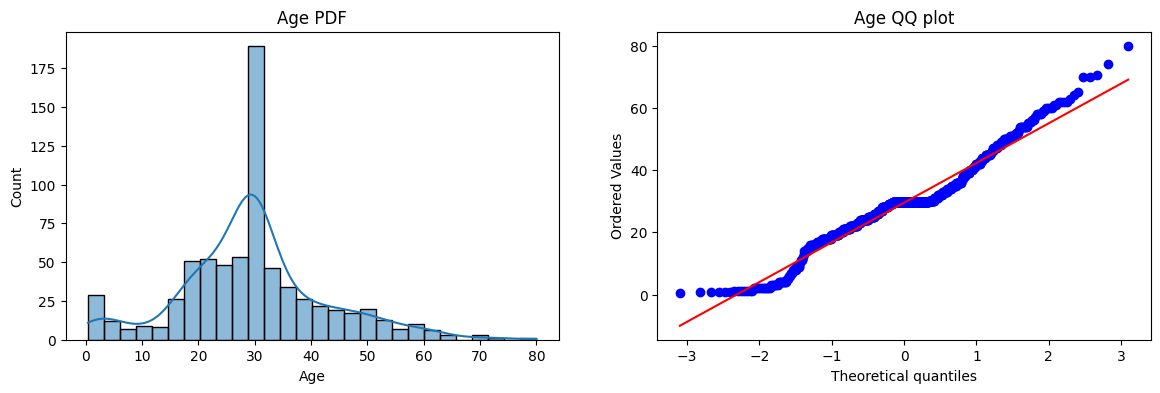

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Age'], kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ plot')

plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


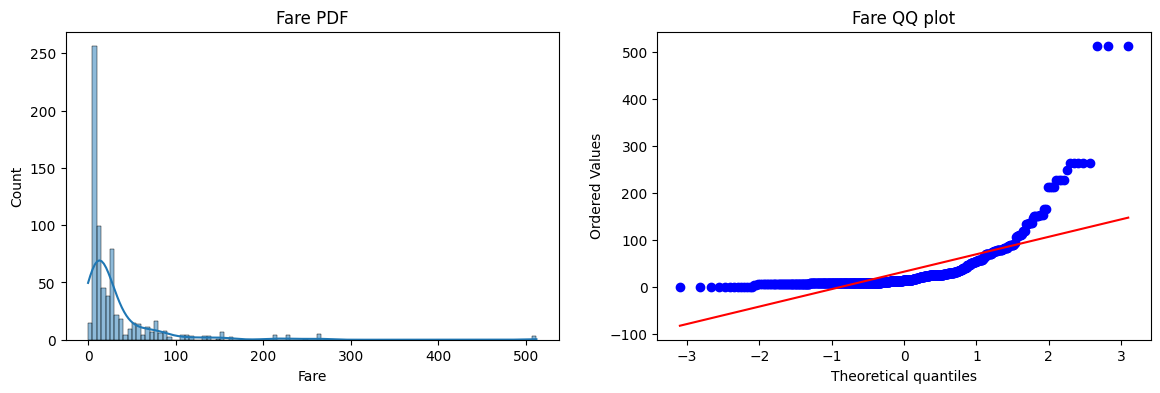

In [11]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(X_train['Fare'], kde=True)
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ plot')

plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

In [13]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [14]:
clf.fit(X_train,Y_train) 
clf2.fit(X_train,Y_train)

y_pred = clf.predict(X_test)
y_pred2 = clf.predict(X_test)

print("Accuracy Score LR", accuracy_score(Y_test,y_pred))
print("Accuracy Score DT", accuracy_score(Y_test,y_pred2))

Accuracy Score LR 0.6480446927374302
Accuracy Score DT 0.6480446927374302


In [15]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer 

In [16]:
trf = FunctionTransformer(func=np.log1p)

In [17]:
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [18]:
clf.fit(X_train_transformed,Y_train) 
clf2.fit(X_train_transformed,Y_train)

y_pred = clf.predict(X_test_transformed)
y_pred2 = clf.predict(X_test_transformed)

print("Accuracy Score LR", accuracy_score(Y_test,y_pred))
print("Accuracy Score DT", accuracy_score(Y_test,y_pred2))

Accuracy Score LR 0.6815642458100558
Accuracy Score DT 0.6815642458100558


# Difference After applying Log Transformer

Text(0.5, 1.0, 'After transformation')

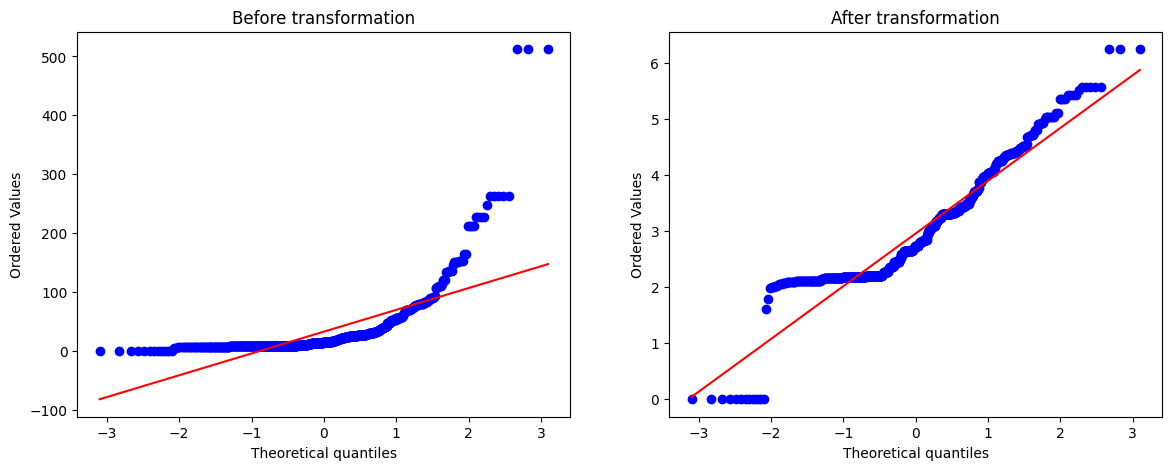

In [19]:
plt.figure(figsize=(14,5))
plt.subplot(121)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Before transformation')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist='norm', plot=plt)
plt.title('After transformation')